In [1]:
import pandas as pd

In [3]:
yob1880=pd.read_csv("babynames/yob1880.txt",
                   names=['name', 'sex', 'births'])
yob1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [6]:
#성별로 그룹화한 다음, 각 그룹에 대해 births의 합계 출력
yob1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [18]:
columns=['name', 'sex', 'births']
pieces=[]
for year in range(1880,2011):
    frame=pd.read_csv("babynames/yob%d.txt" % year,
                     names=columns)
    frame['year']=year
    pieces.append(frame)
print(len(pieces))

131


In [19]:
names=pd.concat(pieces, ignore_index=True)

In [20]:
print(names)

              name sex  births  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
...            ...  ..     ...   ...
1690779    Zymaire   M       5  2010
1690780     Zyonne   M       5  2010
1690781  Zyquarius   M       5  2010
1690782      Zyran   M       5  2010
1690783      Zzyzx   M       5  2010

[1690784 rows x 4 columns]


In [22]:
totalBirths=names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

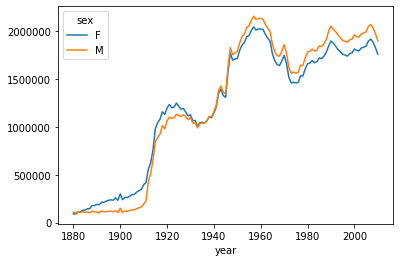

In [26]:
totalBirths.plot()

In [64]:
#이름이 전체 출생수에서 차지하는 비율을 names에 추가
#names['prop']= 구현
#연도와 성별로 그룹화 -> 

a=names.groupby(['year', 'sex']).births.sum()
#a.loc[1880].loc['F']
#a[1880]['F']
#a[0]
#round(names.loc[0]['births']/a.loc[1880].loc['F'],3)

0.078

In [67]:
def addProp(group):#그룹화된 객체(131*2)가 전달됨
    group['prop']=group.births/group.births.sum()
    return group
names=names.groupby(['year', 'sex']).apply(addProp)

In [72]:
# names에서 year와 sex를 기준으로 그룹화를 한 다음
# prop 컬럼 값에 대한 합계를 출력
names.groupby(['year','sex']).prop.max()

year  sex
1880  F      0.077643
      M      0.087381
1881  F      0.075243
      M      0.087039
1882  F      0.075558
               ...   
2008  M      0.011075
2009  F      0.012159
      M      0.010660
2010  F      0.012923
      M      0.011523
Name: prop, Length: 262, dtype: float64

In [83]:
def getTop1000(group):
    return group.sort_values('births', ascending=False)
top1000=names.groupby(['year','sex']).apply(getTop1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1689440      Gevon   M       5  2010  0.000003
         1689439     Gerron   M       5  2010  0.000003
         1689438    Georgiy   M       5  2010  0.000003
         1689437   Geoffery   M       5  2010  0.000003
         1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]

In [88]:
top1000.reset_index(drop=True, inplace=True)
#names
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Gevon,M,5,2010,0.000003
1690780,Gerron,M,5,2010,0.000003
1690781,Georgiy,M,5,2010,0.000003
1690782,Geoffery,M,5,2010,0.000003
